# Chapter 12: Custom Models and Training with TensorFlow

### Ensure GPU Env is working correctly

In [1]:
import tensorflow as tf
import os
from tensorflow import keras

In [2]:
tf.__version__ # recently updated tf version

'2.6.0'

In [3]:
keras.__version__ #recently updated keras version 

'2.6.0'

In [4]:
print("Num of GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num of GPUs Available:  1


### Libraries

In [5]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Tensors and Operations in TensorFlow

### Tensors

In [6]:
tf.constant([[1., 2., 3.], [4., 5., 6.]]) # matrix

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [7]:
tf.constant(42) # scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [8]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [9]:
t.shape

TensorShape([2, 3])

In [10]:
t.dtype

tf.float32

### Indexing

In [11]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [12]:
t[1:, 2:]

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[6.]], dtype=float32)>

In [13]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

### Operations 

In [14]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [15]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [16]:
t @ tf.transpose(t) # @ symbol is for multiply like tf.matmul() 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### Keras backend in tensorflow

In [17]:
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

## Using NumPy with TensorFlow for datatypes

In [18]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [19]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [20]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [21]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [22]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

## Issues that can occur with different data types

In [23]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [24]:
try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


In [25]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

## Strings in TensorFlow

In [26]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [27]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [28]:
#Python ord() function returns the Unicode code from a given character.
u = tf.constant([ord(c) for c in "café"]) 
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [29]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [30]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

### String arrays

In [31]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [32]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [33]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

### Ragged Tensors

In [34]:
print(r[0])

tf.Tensor([ 67  97 102 233], shape=(4,), dtype=int32)


In [35]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [36]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [37]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [38]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [39]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]])>

### Sparse Tensors

In [40]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])

In [41]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [42]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [43]:
s2 = s * 2.0
print(s2)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [44]:
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [45]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [46]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [47]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] is out of order. Many sparse ops require sorted indices.
  Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [48]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Sets in Tensorflow

In [49]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]])>

In [50]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]])>

In [51]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]])>

### Variables

In [52]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [53]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [54]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [55]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [56]:
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [57]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]],
                    updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [58]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]],
                                indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

### Tensor Arrays

In [59]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [60]:
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [61]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [62]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>

In [63]:
variance

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>

## Custom Loss Function

We will build a custom loss function with the california housing dataset

In [64]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Now let us build a huber loss function to use as our custom function

In [65]:
def huberloss_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

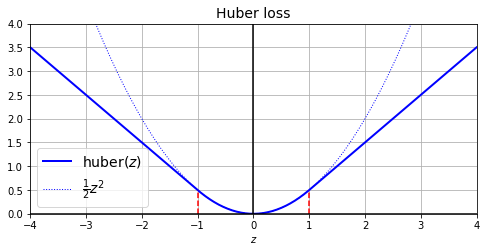

In [66]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huberloss_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huberloss_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huberloss_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [67]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [68]:
model.compile(loss=huberloss_fn, optimizer="nadam", metrics=["mae"])

In [69]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_val_scaled, y_val))

Epoch 1/2
363/363 [==============================] - 3s 8ms/step - loss: 0.5900 - mae: 0.9428 - val_loss: 0.2318 - val_mae: 0.5300
Epoch 2/2
363/363 [==============================] - 3s 8ms/step - loss: 0.2150 - mae: 0.5134 - val_loss: 0.1962 - val_mae: 0.4847


## Saving & Loading Models with Custom Objects

In [70]:
model.save("my_model_with_a_custom_loss.h5")

In [71]:
model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huberloss_fn": huberloss_fn})

In [72]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_val_scaled, y_val))

Epoch 1/2
363/363 [==============================] - 3s 9ms/step - loss: 0.2041 - mae: 0.4971 - val_loss: 0.1941 - val_mae: 0.4760
Epoch 2/2
363/363 [==============================] - 3s 8ms/step - loss: 0.1988 - mae: 0.4889 - val_loss: 0.2029 - val_mae: 0.4852


If we wanted our huber loss function to haver a threshold, we could do that as well:

In [73]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [74]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [75]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_val_scaled, y_val))

Epoch 1/2
363/363 [==============================] - 4s 9ms/step - loss: 0.2190 - mae: 0.4870 - val_loss: 0.2506 - val_mae: 0.4899
Epoch 2/2
363/363 [==============================] - 3s 9ms/step - loss: 0.2164 - mae: 0.4835 - val_loss: 0.2157 - val_mae: 0.4674


In [76]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [77]:
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

In [78]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_val_scaled, y_val))

Epoch 1/2
363/363 [==============================] - 2s 5ms/step - loss: 0.2131 - mae: 0.4787 - val_loss: 0.2228 - val_mae: 0.4708
Epoch 2/2
363/363 [==============================] - 2s 4ms/step - loss: 0.2094 - mae: 0.4745 - val_loss: 0.2351 - val_mae: 0.4814


Now we could create a class with the huber loss function with its own call method and configuration threshold all in one, and then assign a variable to that object:

In [79]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [80]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [81]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [82]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_val_scaled, y_val))

Epoch 1/2
363/363 [==============================] - 3s 7ms/step - loss: 0.7537 - mae: 0.9386 - val_loss: 0.5733 - val_mae: 0.6871
Epoch 2/2
363/363 [==============================] - 3s 8ms/step - loss: 0.2631 - mae: 0.5303 - val_loss: 0.4541 - val_mae: 0.6010


In [83]:
model.save("my_model_with_a_custom_loss_class.h5")

In [84]:
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                                custom_objects={"HuberLoss": HuberLoss})

In [85]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_val_scaled, y_val))

Epoch 1/2
363/363 [==============================] - 3s 7ms/step - loss: 0.2410 - mae: 0.5066 - val_loss: 0.3598 - val_mae: 0.5484
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.2282 - mae: 0.4957 - val_loss: 0.2517 - val_mae: 0.4930


In [86]:
model.loss.threshold

2.0

## Different Custom Functions

In [87]:
def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [88]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [89]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [90]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [91]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_val_scaled, y_val))

Epoch 1/2
363/363 [==============================] - 3s 7ms/step - loss: 1.7384 - mae: 0.9251 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 3s 9ms/step - loss: 0.6389 - mae: 0.5124 - val_loss: inf - val_mae: inf


In [92]:
model.save("my_model_with_many_custom_parts.h5")

In [93]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

In [94]:
# Custom Class for L1 Regulization
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [95]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [96]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [97]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_val_scaled, y_val))

Epoch 1/2
363/363 [==============================] - 4s 9ms/step - loss: 1.7839 - mae: 0.9155 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 3s 9ms/step - loss: 0.6402 - mae: 0.5332 - val_loss: inf - val_mae: inf


In [98]:
model.save("my_model_with_many_custom_parts.h5")

In [99]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

## Custom Metrics inside of models

In [100]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [101]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [102]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 3s 8ms/step - loss: 1.8413 - huber_fn: 0.7952
Epoch 2/2
363/363 [==============================] - 3s 8ms/step - loss: 0.5001 - huber_fn: 0.2449


One issue that can arise from using the function for multiple fields such as loss and metrics is that there can be a floating point precision error where the values are not exact. One example is shown below:

In [103]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

In [104]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 4s 9ms/step - loss: 0.1104 - huber_fn: 0.2248
Epoch 2/2
363/363 [==============================] - 3s 8ms/step - loss: 0.1070 - huber_fn: 0.2176


In [105]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.1103866770863533, 0.11299403922789891)

## Metrics in Keras and Creating a Custom Streamed Metric

Keras has its own precision function. Let's take a look at it

In [106]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [107]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [108]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [109]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [110]:
precision.reset_states()

Now let's create our own metric with the Huber Loss function we used earlier and then have it where that loss function is updated if the function is called for several instances. So it is keeping a tally if you will.

In [111]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [112]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]])) 

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [113]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [114]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [115]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [116]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [117]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

In [118]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 3s 8ms/step - loss: 0.8741 - huber_metric_1: 0.8741
Epoch 2/2
363/363 [==============================] - 3s 8ms/step - loss: 0.2674 - huber_metric_1: 0.2674


In [119]:
model.save("my_model_with_a_custom_metric.h5")

In [120]:
model = keras.models.load_model("my_model_with_a_custom_metric.h5",
                                custom_objects={"huber_fn": create_huber(2.0),
                                                "HuberMetric": HuberMetric})

In [121]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 3s 8ms/step - loss: 0.2427 - huber_metric_1: 0.2427
Epoch 2/2
363/363 [==============================] - 3s 8ms/step - loss: 0.2303 - huber_metric_1: 0.2303


In [122]:
model.metrics[-1].threshold

2.0

Knowing now that the model metrics can hold our threshold in the metrics array, we could have built out class for the HuberMetric like the following:

In [123]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}     

In [124]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [125]:
model.compile(loss=keras.losses.Huber(2.0), optimizer="nadam", weighted_metrics=[HuberMetric(2.0)])

In [126]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),
                    epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 4s 10ms/step - loss: 0.4250 - HuberMetric: 0.8510
Epoch 2/2
363/363 [==============================] - 4s 10ms/step - loss: 0.1183 - HuberMetric: 0.2369


In [127]:
# Still a discrepency but with different functions and it is much smaller
history.history["loss"][0], history.history["HuberMetric"][0] * sample_weight.mean()

(0.4250105619430542, 0.4250104478068792)

In [128]:
model.save("my_model_with_a_custom_metric_v2.h5")

In [129]:
model = keras.models.load_model("my_model_with_a_custom_metric_v2.h5",
                                custom_objects={"HuberMetric": HuberMetric})

In [130]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 4s 9ms/step - loss: 0.2260 - HuberMetric: 0.2260
Epoch 2/2
363/363 [==============================] - 3s 9ms/step - loss: 0.2220 - HuberMetric: 0.2220


In [131]:
model.metrics[-1].threshold

2.0

## Custom Model Layers

In [132]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [133]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787948, 1.        , 2.7182817 ], dtype=float32)>

In [134]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_val_scaled, y_val))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 4ms/step - loss: 3.0698 - val_loss: 1.3855
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 0.7505 - val_loss: 0.4814
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5433 - val_loss: 0.4066
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4274 - val_loss: 0.3779
Epoch 5/5
162/162 [==============================] - 0s 1ms/step - loss: 0.4123


0.4122823476791382

Performance was okay, let's now create a class that we will build to hold our units, our activation function, our bias and will be able to work out the weights for the neurons and our input and output shape for the model

In [135]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [136]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [137]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_val_scaled, y_val))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 3s 8ms/step - loss: 1.7071 - val_loss: 0.6440
Epoch 2/2
162/162 [==============================] - 0s 1ms/step - loss: 0.4850


0.484973669052124

Creating our custom model better than the default one from the Sequential API one we built. Let's save the model and build upon this idea where we can build a custom multi layer model:

In [138]:
model.save("my_model_with_a_custom_layer.h5")

In [139]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

In [140]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        print("X1.shape: ", X1.shape ," X2.shape: ", X2.shape) # Debugging of custom layer
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

In [141]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

X1.shape:  (None, 2)  X2.shape:  (None, 2)


We're getting None values... This is because we don't know the batch size in the first dimension. Lets now pass data through to this custom layer. But first,w e will split the dataset inputs into 2 parts in the following functions:

In [142]:
def split_data(data):
    columns_count = data.shape[-1]
    half = columns_count // 2
    return data[:, :half], data[:, half:]

X_train_scaled_A, X_train_scaled_B = split_data(X_train_scaled)
X_val_scaled_A, X_val_scaled_B = split_data(X_val_scaled)
X_test_scaled_A, X_test_scaled_B = split_data(X_test_scaled)

# Printing the splitted data shapes
X_train_scaled_A.shape, X_train_scaled_B.shape

((11610, 4), (11610, 4))

Now our Class Object will recognize our inputs:

In [143]:
outputs1, outputs2 = MyMultiLayer()((X_train_scaled_A, X_train_scaled_B))

X1.shape:  (11610, 4)  X2.shape:  (11610, 4)


Time to build out the model with the API and test it:

In [144]:
input_A = keras.layers.Input(shape=X_train_scaled_A.shape[-1])
input_B = keras.layers.Input(shape=X_train_scaled_B.shape[-1])
hidden_A, hidden_B = MyMultiLayer()((input_A, input_B))
hidden_A = keras.layers.Dense(30, activation='selu')(hidden_A)
hidden_B = keras.layers.Dense(30, activation='selu')(hidden_B)
concat = keras.layers.Concatenate()((hidden_A, hidden_B))
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

X1.shape:  (None, 4)  X2.shape:  (None, 4)


In [145]:
model.compile(loss='mse', optimizer='nadam')

In [146]:
model.fit((X_train_scaled_A, X_train_scaled_B), y_train, epochs=2,
          validation_data=((X_val_scaled_A, X_val_scaled_B), y_val))

Epoch 1/2
X1.shape:  (None, 4)  X2.shape:  (None, 4)
X1.shape:  (None, 4)  X2.shape:  (None, 4)
363/363 [==============================] - 5s 11ms/step - loss: 1.9051 - val_loss: 1.9715
Epoch 2/2
363/363 [==============================] - 4s 11ms/step - loss: 1.0005 - val_loss: 0.9388


Now let's build a custom layer and build it into a new model:

In [147]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [148]:
model = keras.models.Sequential([
    AddGaussianNoise(stddev=1.0),
    keras.layers.Dense(30, activation="selu"),
    keras.layers.Dense(1)
])

In [149]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_val_scaled, y_val))
model.evaluate(X_test_scaled, y_test) # Should be 162 batches for shape of data

Epoch 1/2
363/363 [==============================] - 4s 8ms/step - loss: 2.5799 - val_loss: 2.6121
Epoch 2/2
162/162 [==============================] - 0s 2ms/step - loss: 0.8036


0.8036043643951416

## Custom Models

Let us now build a custom model using the Functional API

In [150]:
X_new_scaled = X_test_scaled

In [151]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs): # layers and neurons for inputs
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [152]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs): # explicit parameter is output dimension
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [153]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 8s 20ms/step - loss: 15.2298
Epoch 2/5
363/363 [==============================] - 7s 20ms/step - loss: 3.0809
Epoch 3/5
363/363 [==============================] - 7s 20ms/step - loss: 0.7646
Epoch 4/5
363/363 [==============================] - 7s 20ms/step - loss: 1.2876
Epoch 5/5
162/162 [==============================] - 1s 4ms/step - loss: 0.5818


In [154]:
model.save("my_custom_model.ckpt")

INFO:tensorflow:Assets written to: my_custom_model.ckpt\assets


INFO:tensorflow:Assets written to: my_custom_model.ckpt\assets


In [155]:
model = keras.models.load_model("my_custom_model.ckpt")

In [156]:
history = model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
363/363 [==============================] - 8s 21ms/step - loss: 0.7067
Epoch 2/5
363/363 [==============================] - 8s 21ms/step - loss: 0.4976
Epoch 3/5
363/363 [==============================] - 7s 21ms/step - loss: 0.8601
Epoch 4/5
363/363 [==============================] - 8s 21ms/step - loss: 0.8105
Epoch 5/5
363/363 [==============================] - 7s 21ms/step - loss: 0.5850


We could have also used the Sequential API instead where we create an object instance of our class and then pass it through the keras api:

In [157]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

In [158]:
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 7s 18ms/step - loss: 1.4069
Epoch 2/5
363/363 [==============================] - 6s 18ms/step - loss: 0.5799
Epoch 3/5
363/363 [==============================] - 6s 18ms/step - loss: 0.4181
Epoch 4/5
363/363 [==============================] - 6s 17ms/step - loss: 0.3531
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.7453


## Defining loss functions based on weights & activation functions in hidden layers

In the following example, we will build a custom loss model with 5 hidden layers and an output layer. There will be an auxiliary output as well for the hidden layer. This output will be the reconstruction loss (mean square difference between reconstruction and inputs). This is to promoto the model to preserve as much information as possible in the hidden layers. 

In [159]:
class ReconstructingRegressor(keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
        self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        # super().build(batch_input_shape) super method doesn't work in TF 2.4 or greater

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
        return self.out(Z)

In [160]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Epoch 1/2
363/363 [==============================] - 8s 19ms/step - loss: 0.7817 - reconstruction_error: 0.8224
Epoch 2/2
363/363 [==============================] - 7s 19ms/step - loss: 0.4488 - reconstruction_error: 0.4047


## Automatic Differentiation Example In TF

In [161]:
# Example f(w1,w2) function 
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

Now if we wanted to compute the first derivative of this function, how could we do it? Well, we could use the average rate of change function shown below:

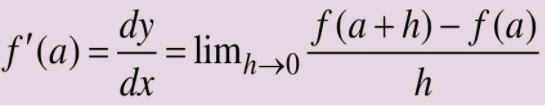

in the next cell, we can use a variable called eps which is a value really close to 0:

In [162]:
# We use a very small value to help us compute the first derivate of f(w1, w2) 
w1, w2 = 5, 3
eps = 1e-6 # small value
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

The first derivative of the function would yield f'(w1', w2) = 6 * w1 + 2 * w2 and f'(w1, w2') = 2*w1

Now if we plug in w1 = 5 and w2 = 3 w.r.t w1, we would get 6(5) + 2(3) = 36

Let's check w.r.t w2 now. This should yield roughly: 2*5 = 10

In [163]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

Great! Now this function is useful in this scenario... but unfortunately not for a neural network. It would be very complex and we would run into several problems calculating partial derivatives. Luckily we can use the tf.GradientTape method in Tensorflow to help with this in the following example:

In [164]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [165]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

**NOTE:** This method can only be used to compute one set of gradients. The below cell shows what happens if we try with 2 seperate gradients:

In [166]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
try:
    dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print(ex)

A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)


To fix this, we just need to set *persistent = True*

In [167]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)
del tape # Delete tape to free up resources

In [168]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

In [169]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2]) # Doesn't work with anything other than variables already defined

In [170]:
gradients

[None, None]

The above will only work if we are "Watching" the tensors involving every operation related to them.

In [171]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [172]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

We can also do mathematical operations with our tape too within our functions:

In [173]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.) # 40
    z2 = f(w1, w2 + 5.) # 46
    z3 = f(w1, w2 + 7.) # 50 (should sum to 136)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [174]:
with tf.GradientTape(persistent=True) as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tf.reduce_sum(tf.stack([tape.gradient(z, [w1, w2]) for z in (z1, z2, z3)]), axis=0)
del tape

In [175]:
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
            for jacobian in jacobians]
del hessian_tape

In [176]:
jacobians # Right back to what we had prior

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [177]:
hessians # After reduce sum and stack

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

We also may want to stop gradients from backpropagating through certain parts of the neural network. To do this, we can use tensorflows stop_gradient function to assist:

In [178]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

tape.gradient(z, [w1, w2]) # Only input shape, None for output

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [179]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_softplus(x) # Issue with softplus function resulting in NaN output

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

We run into the issue above because autodiff ends up com‐
puting infinity divided by infinity (which returns NaN). So we can just simply return the derivative of the softplus function shown below with a custom_gradient decorator from TensorFlow

In [180]:
#Fix
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

In [181]:
def my_better_softplus(z):
    return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

In [182]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

## Custom Training Loops with AutoDifferentiation

In [183]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [184]:
def random_batch(X, y, batch_size=32): # Randomly samples batch of instances from training set
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [185]:
# Create function that displayed training status with number of stuss and the mean loss as well
def print_status_bar(iteration, total, loss, metrics=None):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{}/{} - ".format(iteration, total) + metrics,
          end=end)

In [186]:
import time

mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 - loss: 0.0900 - mean_square: 858.5000


If we want to get fancier with a progress bar, typically how tensorflow's Sequential API Operates:

In [187]:
def progress_bar(iteration, total, size=30):
    running = iteration < total
    c = ">" if running else "="
    p = (size - 1) * iteration // total
    fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
    params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
    return fmt.format(*params)

In [188]:
progress_bar(3500, 10000, size=6)

' 3500/10000 [=>....]'

In [189]:
def print_status_bar(iteration, total, loss, metrics=None, size=30):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{} - {}".format(progress_bar(iteration, total), metrics), end=end)

In [190]:
mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 [==============================] - loss: 0.0900 - mean_square: 858.5000


Let's now define hyperparameters, an optimizer, the loss function of our choosing and some metrics to go along with it

In [191]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [192]:
# Now for some magic
for epoch in range(1, n_epochs + 1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5
11610/11610 [==============================] - mean: 1.4477 - mean_absolute_error: 0.5749
Epoch 2/5
11610/11610 [==============================] - mean: 0.6291 - mean_absolute_error: 0.5146
Epoch 3/5
11610/11610 [==============================] - mean: 0.6780 - mean_absolute_error: 0.5322
Epoch 4/5
11610/11610 [==============================] - mean: 0.6865 - mean_absolute_error: 0.5320
Epoch 5/5
11610/11610 [==============================] - mean: 0.6436 - mean_absolute_error: 0.5190


## Custom Tensorflow Functions

Let us start this section with simple custom function that returns the cube of an integer:

In [193]:
def cube(x):
    return x ** 3

In [194]:
cube(2)

8

In [195]:
# What happens if we place tensorflow constants inside
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

Neat, but Tensorflow can actually do this for us with the *tf.function* call:

In [196]:
tf_cube = tf.function(cube)
tf_cube

In [197]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

Now we have a custom tensorflow function. Great!

In [198]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

## More on TF Functions and Concrete Functions

Every time a function is traced, a new concrete function is created. You can directly obtain a concrete function, by using get_concrete_function.

In [199]:
concrete_function = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_function.graph

In [200]:
concrete_function(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [201]:
concrete_function is tf_cube.get_concrete_function(tf.constant(2.0))

True

## TF Function Definitions and Graphs

In [202]:
concrete_function.graph

In [203]:
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [204]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [205]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [206]:
concrete_function.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [207]:
concrete_function.graph.get_tensor_by_name('Identity:0')

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [208]:
concrete_function.function_def.signature

name: "__inference_cube_613383"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

## Using TF Functions as a decorator and extracting their computation graphs

In [209]:
@tf.function
def tf_cube(x):
    print("print:", x)
    return x ** 3

In [210]:
result = tf_cube(tf.constant(2.0))

print: Tensor("x:0", shape=(), dtype=float32)


In [211]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [212]:
result = tf_cube(2)
result = tf_cube(3)
result = tf_cube(tf.constant([[1., 2.]])) # New shape: trace!
result = tf_cube(tf.constant([[3., 4.], [5., 6.]])) # New shape: trace!
result = tf_cube(tf.constant([[7., 8.], [9., 10.], [11., 12.]])) # New shape: trace!

print: 2
print: 3
print: Tensor("x:0", shape=(1, 2), dtype=float32)
print: Tensor("x:0", shape=(2, 2), dtype=float32)


print: Tensor("x:0", shape=(3, 2), dtype=float32)


In [213]:
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("Tracing", images)
    return images[:, ::2, ::2] # drop half the rows and columns

In [214]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
preprocessed_images = shrink(img_batch_1) # Traces the function.
preprocessed_images = shrink(img_batch_2) # Reuses the same concrete function.

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [215]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
    preprocessed_images = shrink(img_batch_3)  # rejects unexpected types or shapes
except ValueError as ex:
    print(ex)

Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[0.53214884 0.21943843]
  [0.549847   0.85885656]]

 [[0.46057808 0.4719727 ]
  [0.5660145  0.22303593]]], shape=(2, 2, 2), dtype=float32))
  input_signature: (
    TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None))


## How to Use Autograph to Capture Control Flow

In [216]:
@tf.function
def add_10(x):
    for i in range(10):
        x += 1
    return x

In [217]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [218]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [219]:
# Dynamic loop with tf.while_loop()
@tf.function
def add_10(x):
    condition = lambda i, x: tf.less(i, 10)
    body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

In [220]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [221]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

In [222]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x = x + 1
    return x

In [223]:
add_10.get_concrete_function(tf.constant(0)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'range/start' type=Const>,
 <tf.Operation 'range/limit' type=Const>,
 <tf.Operation 'range/delta' type=Const>,
 <tf.Operation 'range' type=Range>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'floordiv' type=FloorDiv>,
 <tf.Operation 'mod' type=FloorMod>,
 <tf.Operation 'zeros_like' type=Const>,
 <tf.Operation 'NotEqual' type=NotEqual>,
 <tf.Operation 'Cast' type=Cast>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'zeros_like_1' type=Const>,
 <tf.Operation 'Maximum' type=Maximum>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

## Handling Variable and Other Resources in TF Functions

In [224]:
counter = tf.Variable(0)

@tf.function
def increment(counter, c=1):
    return counter.assign_add(c)

In [225]:
increment(counter)
increment(counter)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [226]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [227]:
counter = tf.Variable(0)

@tf.function
def increment(c=1):
    return counter.assign_add(c)

In [228]:
increment()
increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [229]:
function_def = increment.get_concrete_function().function_def
function_def.signature.input_arg[0]

name: "assignaddvariableop_resource"
type: DT_RESOURCE

In [230]:
class Counter:
    def __init__(self):
        self.counter = tf.Variable(0)

    @tf.function
    def increment(self, c=1):
        return self.counter.assign_add(c)

In [231]:
c = Counter()
c.increment()
c.increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [232]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x += 1
    return x

print(tf.autograph.to_code(add_10.python_function))

def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [233]:
def display_tf_code(func):
    from IPython.display import display, Markdown
    if hasattr(func, "python_function"):
        func = func.python_function
    code = tf.autograph.to_code(func)
    display(Markdown('```python\n{}\n```'.format(code)))

In [234]:
display_tf_code(add_10)

```python
def tf__add(x):
    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def loop_body(itr):
            nonlocal x
            i = itr
            x = ag__.ld(x)
            x += 1
        i = ag__.Undefined('i')
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).range, (10,), None, fscope), None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'i'})
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

```

## How to use TF Functions with tf.keras

In [235]:
# Custom loss function
def my_mse(y_true, y_pred):
    print("Tracing loss my_mse()")
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [236]:
# Custom metric function
def my_mae(y_true, y_pred):
    print("Tracing metric my_mae()")
    return tf.reduce_mean(tf.abs(y_pred - y_true))

In [237]:
# Custom layer
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.units),
                                      initializer='uniform',
                                      trainable=True)
        self.biases = self.add_weight(name='bias', 
                                      shape=(self.units,),
                                      initializer='zeros',
                                      trainable=True)
        super().build(input_shape)

    def call(self, X):
        print("Tracing MyDense.call()")
        return self.activation(X @ self.kernel + self.biases)

In [238]:
# Custom model
class MyModel(keras.models.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = MyDense(30, activation="relu")
        self.hidden2 = MyDense(30, activation="relu")
        self.output_ = MyDense(1)

    def call(self, input):
        print("Tracing MyModel.call()")
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_(concat)
        return output

model = MyModel()

In [239]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

In [240]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_val_scaled, y_val))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
359/363 [============================>.] - ETA: 0s - loss: 1.2686 - my_mae: 0.7728Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
363/363 [==============================] - 5s 11ms/step - loss: 1.2583 - my_mae: 0.7690 - val_loss: 0.4567 - val_my_mae: 0.4741
Epoch 2/2
162/162 [==============================] - 0s 3ms/step - loss: 0.4191 - my_mae: 0.4635


[0.4191416800022125, 0.4635005593299866]

You can turn this off by creating the model with dynamic=True (or calling super().__init__(dynamic=True, **kwargs) in the model's constructor):

In [241]:
model = MyModel(dynamic=True)

In [242]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

In [243]:
model.fit(X_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(X_val_scaled[:64], y_val[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.570329666137695, 2.0695180892944336]

In [244]:
#Without running dynamically
model = MyModel()

In [245]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae], run_eagerly=True) # add run_eargerly method

In [246]:
model.fit(X_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(X_val_scaled[:64], y_val[:64]), verbose=0)
model.evaluate(X_test_scaled[:64], y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.597047805786133, 2.0707335472106934]

## Writing Custom Optimizer Functions

In [247]:
class MyMomentumOptimizer(keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.001, momentum=0.9, name="MyMomentumOptimizer", **kwargs):
        """Call super().__init__() and use _set_hyper() to store hyperparameters"""
        super().__init__(name, **kwargs)
        self._set_hyper("learning_rate", kwargs.get("lr", learning_rate)) # handle lr=learning_rate
        self._set_hyper("decay", self._initial_decay) # 
        self._set_hyper("momentum", momentum)
    
    def _create_slots(self, var_list):
        """For each model variable, create the optimizer variable associated with it.
        TensorFlow calls these optimizer variables "slots".
        For momentum optimization, we need one momentum slot per model variable.
        """
        for var in var_list:
            self.add_slot(var, "momentum")

    @tf.function
    def _resource_apply_dense(self, grad, var):
        """Update the slots and perform one optimization step for one model variable
        """
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype) # handle learning rate decay
        momentum_var = self.get_slot(var, "momentum")
        momentum_hyper = self._get_hyper("momentum", var_dtype)
        momentum_var.assign(momentum_var * momentum_hyper - (1. - momentum_hyper)* grad)
        var.assign_add(momentum_var * lr_t)

    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum"),
        }

In [248]:
model = keras.models.Sequential([keras.layers.Dense(1, input_shape=[8])])
model.compile(loss="mse", optimizer=MyMomentumOptimizer())
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 4.6434
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 1.5212
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.8948
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.7402
Epoch 5/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6926


# End of Chapter Exercises

1. How would you describe TensorFlow in a short sentence? What are its main features? Can you name other popular Deep Learning libraries?
2. Is TensorFlow a drop-in replacement for NumPy? What are the main differences
between the two?
3. Do you get the same result with tf.range(10) and tf.constant(np.arange(10))?
4. Can you name six other data structures available in TensorFlow, beyond regular
tensors?
5. A custom loss function can be defined by writing a function or by subclassing the
keras.losses.Loss class. When would you use each option?
6. Similarly, a custom metric can be defined in a function or a subclass of
keras.metrics.Metric. When would you use each option?
7. When should you create a custom layer versus a custom model?
8. What are some use cases that require writing your own custom training loop?
9. Can custom Keras components contain arbitrary Python code, or must they be
convertible to TF Functions?
10. What are the main rules to respect if you want a function to be convertible to a
TF Function?
11. When would you need to create a dynamic Keras model? How do you do that?
Why not make all your models dynamic?
12. Implement a custom layer that performs Layer Normalization (we will use this
type of layer in Chapter 15):

    a. The build() method should define two trainable weights α and β, both of
    shape input_shape[-1:] and data type tf.float32. α should be initialized
    with 1s, and β with 0s.
    
    b. The call() method should compute the mean μ and standard deviation σ of
    each instance’s features. For this, you can use tf.nn.moments(inputs,
    axes=-1, keepdims=True), which returns the mean μ and the variance σ
    2 of all instances (compute the square root of the variance to get the standard
    deviation). Then the function should compute and return α⊗(X - μ)/(σ + ε) +
    β, where ⊗ represents itemwise multiplication (*) and ε is a smoothing term
    (small constant to avoid division by zero, e.g., 0.001).
    
    c. Ensure that your custom layer produces the same (or very nearly the same)
    output as the keras.layers.LayerNormalization layer.
    <br><br/>

13. Train a model using a custom training loop to tackle the Fashion MNIST dataset
(see Chapter 10).

    a. Display the epoch, iteration, mean training loss, and mean accuracy over each
    epoch (updated at each iteration), as well as the validation loss and accuracy at
    the end of each epoch.
    
    b. Try using a different optimizer with a different learning rate for the upper lay‐
    ers and the lower layers.

***1. How would you describe TensorFlow in a short sentence? What are its main features? Can you name other popular Deep Learning libraries?***

A: Tensorflow is a machine learning framework that can be used to design, build and train deep learning models. The name is derived from the operations that neural networks perform on multidimensional data arrays. They are actually called tensors so it is a flow of tensors across layers.  Some main features are that is it open source library filled with tons of useful functions, it is scalable, has pre build architectures for deep networks, has a stable API that let's users build their own networks, and class fucntions and a plethora of other unique features. Another popular deep learning library is PyTorch from Facebook. 

***2. Is TensorFlow a drop-in replacement for NumPy? What are the main differences
between the two?***

A: Tensorflow is not a drop-in replacement. As a matter of fact there can be data discrepencies between 64bit and 32bit floating numbers where TensorFlow uses primarily 32-bit as default where NumPy is 64-bit. Although it is very similar to NumPy and it can actually perform same operations using tf.Tensors in Tensorflow with it, They are not exactly interchangable. Main differences are regarding the floating point numbers, functions are not exactly the same and NumPy arrays are mutable, TensorFlow tensors are not.

***3. Do you get the same result with tf.range(10) and tf.constant(np.arange(10))?***

A: Yes, tested in the below cell.

***4. Can you name six other data structures available in TensorFlow, beyond regular
tensors?***

A: Besides regular tensors there are other types of tensors and a select other. They are listed below with a brief description:

1. Sparse Tensors - Represent tensors containing mostly zeros
2. Tensor Arrays - Lists of tensors with same shape and data type
3. Ragged Tensors - Static lists of lists of tensors with same shape and data type
4. String Tensors - Byte strings of type tf.string
5. Sets - Set of tensors. Ex. td.constant([[1,2], [3,4]]) is 2 sets: {1,2}, {3,4}
6. Queues - Data structures that store tensors across multiple steps. Typically FIFO (First in first out)

***5. A custom loss function can be defined by writing a function or by subclassing the
keras.losses.Loss class. When would you use each option?***

A: If you're looking for a quick implementation, thne simply writing a function will suffice. But if you want to keep the threshold for your model after you save it, it would be best to use the loss subclass.

***6. Similarly, a custom metric can be defined in a function or a subclass of
keras.metrics.Metric. When would you use each option?***

A: For the same reason. If the function has hyperparameters that need to be saved along with the model, then you will want to subclass the appropriate class. Otherwise, a simple function on the spot will do. 

***7. When should you create a custom layer versus a custom model?***

A: You should subclass layers and subclass models and then distinguish the layers seperately so the model with the objects you will train on are seperate and easily seperable. 

***8. What are some use cases that require writing your own custom training loop?***

A: One example is what we discussed in Chapter 10 where you need different optimizers in a Wide & Deep Network where it splits. You could also write custom models to do exactly what you want after each iteration and they are generally more traceable as opposed to the ones TF provides you, like if you wanted to track something different metrics you customly create.

***9. Can custom Keras components contain arbitrary Python code, or must they be
convertible to TF Functions?***

A: Python code can be wrapped in Keras components by using the td.function() command like the following: 

def cube(x):
    return x ** 3
    
tf_cube = tf.function(cube) 

that would allow us to get the same output as our function but in tensors.

You could also do the opposite where you wrap it like tf.py_function but it may not work as you need.

***10. What are the main rules to respect if you want a function to be convertible to a
TF Function?***

A: Here is a general list of rules from the textbook:

- If you call any external library, including NumPy or even the standard library,
  this call will run only during tracing; it will not be part of the graph. So, make sure you use   tf.reduce_sum() instead of np.sum(), tf.sort() instead of the built-in sorted() function, and     so on (unless you really want the code to run only during tracing).
  
- You can call other Python functions or TF Functions, but they should follow the
  same rules, as TensorFlow will capture their operations in the computation
  graph. Note that these other functions do not need to be decorated with
  @tf.function.
  
- If the function creates a TensorFlow variable (or any other stateful TensorFlow
  object, such as a dataset or a queue), it must do so upon the very first call, and
  only then, or else you will get an exception. It is usually preferable to createvariables         outside of the TF Function (e.g., in the build() method of a custom
  layer). If you want to assign a new value to the variable, make sure you call its
  assign() method, instead of using the = operator.
  
- The source code of your Python function should be available to TensorFlow. If
  the source code is unavailable (for example, if you define your function in the
  Python shell, which does not give access to the source code, or if you deploy only
  the compiled *.pyc Python files to production), then the graph generation process
  will fail or have limited functionality.
  
- TensorFlow will only capture for loops that iterate over a tensor or a dataset. So
  make sure you use for i in tf.range(x) rather than for i in range(x), or
  else the loop will not be captured in the graph. Instead, it will run during tracing.
  (This may be what you want if the for loop is meant to build the graph, for
  example to create each layer in a neural network.)
  
- As always, for performance reasons, you should prefer a vectorized implementa‐
  tion whenever you can, rather than using loops.
  
***11. When would you need to create a dynamic Keras model? How do you do that?
Why not make all your models dynamic?***

A: As a first, it is super useful for debugging. You can also use any Python debugger to verify your code as well, custom components may not have the same success. Setting a model to be dynamic is as easy as setting *dynamic=True*. You wouldn't want all models to be dynamic as it prevents Keras from using TensorFlow's graph features which in turn limits your models' exportability and portability. 

In [249]:
tf.range(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [250]:
tf.constant(np.arange(10))

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [251]:
#Question 12
'''12. Implement a custom layer that performs Layer Normalization (we will use this
type of layer in Chapter 15):

    a. The build() method should define two trainable weights α and β, both of
    shape input_shape[-1:] and data type tf.float32. α should be initialized
    with 1s, and β with 0s.
    
    b. The call() method should compute the mean μ and standard deviation σ of
    each instance’s features. For this, you can use tf.nn.moments(inputs,
    axes=-1, keepdims=True), which returns the mean μ and the variance σ
    2 of all instances (compute the square root of the variance to get the standard
    deviation). Then the function should compute and return α⊗(X - μ)/(σ + ε) +
    β, where ⊗ represents itemwise multiplication (*) and ε is a smoothing term
    (small constant to avoid division by zero, e.g., 0.001).
    
    c. Ensure that your custom layer produces the same (or very nearly the same)
    output as the keras.layers.LayerNormalization layer.
    <br><br/>'''

'12. Implement a custom layer that performs Layer Normalization (we will use this\ntype of layer in Chapter 15):\n\n    a. The build() method should define two trainable weights α and β, both of\n    shape input_shape[-1:] and data type tf.float32. α should be initialized\n    with 1s, and β with 0s.\n    \n    b. The call() method should compute the mean μ and standard deviation σ of\n    each instance’s features. For this, you can use tf.nn.moments(inputs,\n    axes=-1, keepdims=True), which returns the mean μ and the variance σ\n    2 of all instances (compute the square root of the variance to get the standard\n    deviation). Then the function should compute and return α⊗(X - μ)/(σ + ε) +\n    β, where ⊗ represents itemwise multiplication (*) and ε is a smoothing term\n    (small constant to avoid division by zero, e.g., 0.001).\n    \n    c. Ensure that your custom layer produces the same (or very nearly the same)\n    output as the keras.layers.LayerNormalization layer.\n    <br

### A. The build() method should define two trainable weights α and β, both of shape input_shape[-1:] and data type tf.float32. α should be initialized with 1s, and β with 0s.

In [252]:
class LayerNormalization(keras.layers.Layer):
    def __init_(self, **kwargs):
        super().__init__(**kwargs)
    
    def build(self, batch_input_shape):
        self.alpha = self.add_weight(name="Alpha", shape=batch_input_shape[-1:], initializer="ones")
        self.beta = self.add_weight(name="Beta", shape=batch_input_shape[-1:], initializer="zeros")
        super().build(batch_input_shape)
        

### B. The call() method should compute the mean μ and standard deviation σ of each instance’s features. For this, you can use tf.nn.moments(inputs, axes=-1, keepdims=True), which returns the mean μ and the variance σ 2 of all instances (compute the square root of the variance to get the standard deviation). Then the function should compute and return α⊗(X - μ)/(σ + ε) + β, where ⊗ represents itemwise multiplication (*) and ε is a smoothing term (small constant to avoid division by zero, e.g., 0.001).

In [253]:
class LayerNormalization(keras.layers.Layer):
    def __init__(self, const=0.001, **kwargs):
        super().__init__(**kwargs)
        self.const = const
    
    def build(self, batch_input_shape):
        self.alpha = self.add_weight(name="alpha", shape=batch_input_shape[-1:], initializer="ones")
        self.beta = self.add_weight(name="beta", shape=batch_input_shape[-1:], initializer="zeros")
        super().build(batch_input_shape)
        
    def call(self, X):
        mean, variance = tf.nn.moments(X, axes=-1, keepdims=True)
        return self.alpha * (X - mean) / (tf.sqrt(variance + self.const)) + self.beta
    
    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "const": self.const}
        

### C. Ensure that your custom layer produces the same (or very nearly the same) output as the keras.layers.LayerNormalization layer.

In [254]:
X = X_train.astype(np.float32)

custom_layer_norm = LayerNormalization()
keras_layer_norm = keras.layers.LayerNormalization()

tf.reduce_mean(keras.losses.mean_absolute_error(
    keras_layer_norm(X), custom_layer_norm(X)))

<tf.Tensor: shape=(), dtype=float32, numpy=3.894674e-08>

That's as close as were gonna get. That is a very small number...

In [255]:
# Question 13
'''13. Train a model using a custom training loop to tackle the Fashion MNIST dataset
(see Chapter 10).

    a. Display the epoch, iteration, mean training loss, and mean accuracy over each
    epoch (updated at each iteration), as well as the validation loss and accuracy at
    the end of each epoch.
    
    b. Try using a different optimizer with a different learning rate for the upper layers 
    and the lower layers.'''

'13. Train a model using a custom training loop to tackle the Fashion MNIST dataset\n(see Chapter 10).\n\n    a. Display the epoch, iteration, mean training loss, and mean accuracy over each\n    epoch (updated at each iteration), as well as the validation loss and accuracy at\n    the end of each epoch.\n    \n    b. Try using a different optimizer with a different learning rate for the upper layers \n    and the lower layers.'

### A. Display the epoch, iteration, mean training loss, and mean accuracy over each    epoch (updated at each iteration), as well as the validation loss and accuracy at the end of each epoch.

In [256]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255.
X_val, X_train = X_train_full[:5000], X_train_full[5000:]
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test.astype(np.float32) / 255.

In [257]:
# Use model from End of Chapter 10 Exercises
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(400, activation="relu"),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [258]:
# Custom variables we will need
epoch_num = 10 # Defined Epoch Number
batch_size = 32 # Defined Batch Size
steps = len(X_train) // batch_size # Steps we need for proper batch sizes 
loss_fn = keras.losses.sparse_categorical_crossentropy # loss function
mean_for_loss = keras.metrics.Mean() # Mean training loss
optimizer = keras.optimizers.Nadam(learning_rate=0.01) #Adam optimizer
metrics = [keras.metrics.SparseCategoricalAccuracy()]

In [260]:
from collections import OrderedDict
for epoch in range(1, epoch_num + 1):
    print("Epoch {}/{}".format(epoch, epoch_num))
    for step in range(1, steps + 1):
        X_batch, y_batch = random_batch(X_train, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        status = OrderedDict()
        mean_for_loss(loss)
        status["loss"] = mean_for_loss.result().numpy()
        for metric in metrics:
            metric(y_batch, y_pred)
            status[metric.name] = metric.result().numpy()
        print_status_bar(step * batch_size, len(y_train), mean_for_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_for_loss, metrics)
    y_pred = model(X_val)
    status["val_loss"] = np.mean(loss_fn(y_val, y_pred))
    status["val_accuracy"] = np.mean(keras.metrics.sparse_categorical_accuracy(
        tf.constant(y_val, dtype=np.float32), y_pred))
    for metric in [mean_for_loss] + metrics:
        metric.reset_states()
    print("Validation Loss: ", status["val_loss"])
    print("Validation Accuracy: ", status["val_accuracy"])

Epoch 1/10
55000/55000 [==============================] - mean: 0.5515 - sparse_categorical_accuracy: 0.8024
Validation Loss:  0.45274618
Validation Accuracy:  0.842
Epoch 2/10
55000/55000 [==============================] - mean: 0.4140 - sparse_categorical_accuracy: 0.8517
Validation Loss:  0.43626845
Validation Accuracy:  0.8512
Epoch 3/10
55000/55000 [==============================] - mean: 0.3984 - sparse_categorical_accuracy: 0.8593
Validation Loss:  0.4754962
Validation Accuracy:  0.8476
Epoch 4/10
55000/55000 [==============================] - mean: 0.3811 - sparse_categorical_accuracy: 0.8653
Validation Loss:  0.45564777
Validation Accuracy:  0.8514
Epoch 5/10
55000/55000 [==============================] - mean: 0.3713 - sparse_categorical_accuracy: 0.8690
Validation Loss:  0.44140968
Validation Accuracy:  0.8666
Epoch 6/10
55000/55000 [==============================] - mean: 0.3639 - sparse_categorical_accuracy: 0.8732
Validation Loss:  0.40878305
Validation Accuracy:  0.8668


### B. Try using a different optimizer with a different learning rate for the upper layers and the lower layers.

In [261]:
lower_layers = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(400, activation="relu"), # Change in Dense Layer 
    keras.layers.Dense(150, activation="relu"),  # Change in Dense Layer
])
upper_layers = keras.models.Sequential([
    keras.layers.Dense(10, activation="softmax"),
])
model = keras.models.Sequential([
    lower_layers, upper_layers
])

In [262]:
lower_optimizer = keras.optimizers.SGD(learning_rate=10e-6, momentum=0.95)  # Could Possibly Cradle
upper_optimizer = keras.optimizers.Nadam(learning_rate=10e-5)

In [263]:
# Custom variables we will need
epoch_num = 10 # Defined Epoch Number
batch_size = 32 # Batch Size
steps = len(X_train) // batch_size # Steps we need for proper batch sizes 
loss_fn = keras.losses.sparse_categorical_crossentropy # loss function
mean_for_loss = keras.metrics.Mean() # Mean training loss
metrics = [keras.metrics.SparseCategoricalAccuracy()]

In [264]:
for epoch in range(1, epoch_num + 1):
    print("Epoch {}/{}".format(epoch, epoch_num))
    for step in range(1, steps + 1):
        X_batch, y_batch = random_batch(X_train, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        status = OrderedDict()
        mean_for_loss(loss)
        status["loss"] = mean_for_loss.result().numpy()
        for metric in metrics:
            metric(y_batch, y_pred)
            status[metric.name] = metric.result().numpy()
        print_status_bar(step * batch_size, len(y_train), mean_for_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_for_loss, metrics)
    y_pred = model(X_val)
    status["val_loss"] = np.mean(loss_fn(y_val, y_pred))
    status["val_accuracy"] = np.mean(keras.metrics.sparse_categorical_accuracy(
        tf.constant(y_val, dtype=np.float32), y_pred))
    for metric in [mean_for_loss] + metrics:
        metric.reset_states()
    print("Validation Loss: ", status["val_loss"])
    print("Validation Accuracy: ", status["val_accuracy"])

Epoch 1/10
55000/55000 [==============================] - mean: 1.1122 - sparse_categorical_accuracy: 0.755471
Validation Loss:  0.5797922
Validation Accuracy:  0.7928
Epoch 2/10
55000/55000 [==============================] - mean: 0.5686 - sparse_categorical_accuracy: 0.7967
Validation Loss:  0.54308844
Validation Accuracy:  0.8084
Epoch 3/10
55000/55000 [==============================] - mean: 0.5404 - sparse_categorical_accuracy: 0.8081
Validation Loss:  0.50494415
Validation Accuracy:  0.8188
Epoch 4/10
55000/55000 [==============================] - mean: 0.5179 - sparse_categorical_accuracy: 0.8152
Validation Loss:  0.5515726
Validation Accuracy:  0.8108
Epoch 5/10
55000/55000 [==============================] - mean: 0.5003 - sparse_categorical_accuracy: 0.8209
Validation Loss:  0.5496986
Validation Accuracy:  0.808
Epoch 6/10
55000/55000 [==============================] - mean: 0.4880 - sparse_categorical_accuracy: 0.8264
Validation Loss:  0.50407946
Validation Accuracy:  0.8232


Hmm, didn't look like that helped.. Let's try and build a different model now and test:

In [277]:
lower_layers = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(400, activation="relu"), # Change in Dense Layer 
    keras.layers.Dense(200, activation="relu"),  # Change in Dense Layer
    keras.layers.Dense(100, activation="relu") # Change in Dense Layer
])
upper_layers = keras.models.Sequential([
    keras.layers.Dense(10, activation="softmax"),
])
model = keras.models.Sequential([
    lower_layers, upper_layers
])

In [278]:
lower_optimizer = keras.optimizers.SGD(learning_rate=10e-6, momentum=0.99)  # Could Possibly Cradle
upper_optimizer = keras.optimizers.Nadam(learning_rate=10e-5)

In [279]:
# Custom variables we will need
epoch_num = 10 # Defined Epoch Number
batch_size = 64 # Change Batch Size
steps = len(X_train) // batch_size # Steps we need for proper batch sizes 
loss_fn = keras.losses.sparse_categorical_crossentropy # loss function
mean_for_loss = keras.metrics.Mean() # Mean training loss
metrics = [keras.metrics.SparseCategoricalAccuracy()]

In [280]:
for epoch in range(1, epoch_num + 1):
    print("Epoch {}/{}".format(epoch, epoch_num))
    for step in range(1, steps + 1):
        X_batch, y_batch = random_batch(X_train, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        status = OrderedDict()
        mean_for_loss(loss)
        status["loss"] = mean_for_loss.result().numpy()
        for metric in metrics:
            metric(y_batch, y_pred)
            status[metric.name] = metric.result().numpy()
        print_status_bar(step * batch_size, len(y_train), mean_for_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_for_loss, metrics)
    y_pred = model(X_val)
    status["val_loss"] = np.mean(loss_fn(y_val, y_pred))
    status["val_accuracy"] = np.mean(keras.metrics.sparse_categorical_accuracy(
        tf.constant(y_val, dtype=np.float32), y_pred))
    for metric in [mean_for_loss] + metrics:
        metric.reset_states()
    print("Validation Loss: ", status["val_loss"])
    print("Validation Accuracy: ", status["val_accuracy"])

Epoch 1/10
55000/55000 [==============================] - mean: 1.3283 - sparse_categorical_accuracy: 0.684221
Validation Loss:  0.64274704
Validation Accuracy:  0.7594
Epoch 2/10
55000/55000 [==============================] - mean: 0.6099 - sparse_categorical_accuracy: 0.7638
Validation Loss:  0.5742773
Validation Accuracy:  0.7774
Epoch 3/10
55000/55000 [==============================] - mean: 0.5693 - sparse_categorical_accuracy: 0.7862
Validation Loss:  0.5929462
Validation Accuracy:  0.7934
Epoch 4/10
55000/55000 [==============================] - mean: 0.5450 - sparse_categorical_accuracy: 0.7889
Validation Loss:  0.57417077
Validation Accuracy:  0.784
Epoch 5/10
55000/55000 [==============================] - mean: 0.5280 - sparse_categorical_accuracy: 0.8015
Validation Loss:  0.5248538
Validation Accuracy:  0.8118
Epoch 6/10
55000/55000 [==============================] - mean: 0.5207 - sparse_categorical_accuracy: 0.8045
Validation Loss:  0.57509094
Validation Accuracy:  0.8048


Didn't really improve or do much better here...

# End of Notebook